# Imports

In [1]:
import sklearn
import seaborn
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score

plt.rc('figure', figsize=[50, 50])

# Loading and Restructuring data

### Loading data

In [2]:
def loading_data(file) :
    
    df = pd.DataFrame(pd.read_csv(file))
    
    return df

df_foot = loading_data('footdata.csv')

In [3]:
df_foot.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.347368,0.936842,0.573684,0.434211,14.113158,11.026316,4.834211,3.581579,16.926316,17.955263,5.402632,4.178947,1.468421,1.805263,0.073684,0.113158,2.236974,3.179526,4.153026
std,1.180478,1.027953,0.742485,0.668467,4.368916,4.032106,2.113255,2.031721,4.708925,5.049162,2.535967,2.343706,1.100037,1.225918,0.281050,0.348893,0.730307,0.370348,1.757391
min,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,2.500000,1.500000
25%,0.000000,0.000000,0.000000,0.000000,11.000000,8.000000,3.750000,2.000000,14.000000,14.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000,1.800000,3.000000,3.200000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,3.000000,17.000000,18.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.100000,3.100000,3.750000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,20.000000,21.000000,7.000000,5.000000,2.000000,3.000000,0.000000,0.000000,2.400000,3.250000,4.750000
max,6.000000,6.000000,3.000000,3.000000,29.000000,26.000000,11.000000,11.000000,32.000000,33.000000,14.000000,14.000000,6.000000,5.000000,2.000000,2.000000,7.500000,6.500000,15.000000


### Restructuring data

In [4]:
def results (df, param) :
    
    if param == "home" :
    
        victory = df[df["FTR"]=='H']
        victory = victory.groupby(["HomeTeam"]).agg({"FTR":"count","FTHG":"sum","HS":"sum","HTHG":"sum","HST":"sum","HF":"sum","HC":"sum","HY":"sum","HR":"sum"}).reset_index()
        victory["TV"] = victory["FTR"]
    
        defeat = df[df["FTR"]=='A']
        defeat = defeat.groupby(["HomeTeam"]).agg({"FTR":"count","FTHG":"sum","HS":"sum","HTHG":"sum","HST":"sum","HF":"sum","HC":"sum","HY":"sum","HR":"sum"}).reset_index()
        defeat["TD"] = defeat["FTR"]
    
        null = df[df["FTR"]=='D']
        null = null.groupby(["HomeTeam"]).agg({"FTR":"count","FTHG":"sum","HS":"sum","HTHG":"sum","HST":"sum","HF":"sum","HC":"sum","HY":"sum","HR":"sum"}).reset_index()
        null["TN"] = null["FTR"]
    
        result = pd.concat([victory, defeat, null])
        result = result.groupby(["HomeTeam"]).agg({"TV":"sum","TD":"sum", "TN":"sum","FTHG":"sum","HS":"sum","HTHG":"sum","HST":"sum","HF":"sum","HC":"sum","HY":"sum","HR":"sum"}).reset_index()
        result = result.rename(columns = {"HomeTeam" : "Team","TV":"Victories","TD":"Defeats", "TN":"Nulls","FTHG":"Goals","HS":"Shoots","HTHG":"Half_Time_Goals","HST":"Shoots_on_Target","HF":"Fools","HC":"Corners","HY":"Yellow_Cards","HR":"Red_Cards"})
        
    else :
        
        victory = df[df["FTR"]=='A']
        victory = victory.groupby(["AwayTeam"]).agg({"FTR":"count","FTAG":"sum","AS":"sum","HTAG":"sum","AST":"sum","AF":"sum","AC":"sum","AY":"sum","AR":"sum"}).reset_index()
        victory["TV"] = victory["FTR"]
    
        defeat = df[df["FTR"]=='H']
        defeat = defeat.groupby(["AwayTeam"]).agg({"FTR":"count","FTAG":"sum","AS":"sum","HTAG":"sum","AST":"sum","AF":"sum","AC":"sum","AY":"sum","AR":"sum"}).reset_index()
        defeat["TD"] = defeat["FTR"]
    
        null = df[df["FTR"]=='D']
        null = null.groupby(["AwayTeam"]).agg({"FTR":"count","FTAG":"sum","AS":"sum","HTAG":"sum","AST":"sum","AF":"sum","AC":"sum","AY":"sum","AR":"sum"}).reset_index()
        null["TN"] = null["FTR"]
        
        result = pd.concat([victory, defeat, null])
        result = result.groupby(["AwayTeam"]).agg({"TV":"sum","TD":"sum", "TN":"sum","FTAG" : "sum","HTAG":"sum","AST":"sum","AF":"sum","AC":"sum","AY":"sum","AR":"sum"}).reset_index()
        result = result.rename(columns = {"AwayTeam" : "Team","TV":"Victories","TD":"Defeats", "TN":"Nulls","FTAG":"Goals","AS":"Shoots","HTAG":"Half_Time_Goals","AST":"Shoots_on_Target","AF":"Fools","AC":"Corners","AY":"Yellow_Cards","AR":"Red_Cards"})
    
    return result

result_home = results (df_foot, 'home')

result_away = results (df_foot, 'away')

In [5]:
def merging(df1, df2):
    
    df = pd.concat([df1, df2])
    
    df = df.groupby(["Team"]).agg({'Victories':'sum','Defeats':'sum','Nulls':'sum','Goals':'sum', 'Half_Time_Goals' : 'sum', 'Shoots' : 'sum','Shoots_on_Target': 'sum', 'Fools' : 'sum', 'Corners' : 'sum', 'Yellow_Cards' : 'sum', 'Red_Cards' : 'sum'}).reset_index()
    
    return df

df_foot_agg = merging(result_home, result_away)


In [6]:
df_foot_agg.head()

,Team,Victories,Defeats,Nulls,Goals,Half_Time_Goals,Shoots,Shoots_on_Target,Fools,Corners,Yellow_Cards,Red_Cards
0,Auxerre,12.0,18.0,8.0,33,12,234.0,147,618,181,59,3
1,Bordeaux,22.0,7.0,9.0,65,26,245.0,149,691,163,72,5
2,Caen,13.0,13.0,12.0,48,17,271.0,159,682,181,61,2
3,Le Mans,14.0,13.0,11.0,46,20,265.0,164,707,163,65,6
4,Lens,9.0,16.0,13.0,43,15,267.0,148,601,204,57,3


Le set de données a été retraité : les données ont été aggrégées, les côtes et les dates ont été supprimées (peu utiles dans une ACP/PCA et Clustering. 

Le candidat pourra potentiellement les utiliser, personnellement, je ne vois pas vraiment l'intérêt pour le travail ici.

# Data Visualisation

Pour l'exemple, je vais donner 3 exemples de visualisation (un classement, une boite à moustache/boxplot et une carte de corrélation), le candidat pourra sans doute en produire des plus complexes/plus poussées. 

### Ranking

In [7]:
def scoring_ranking (df) :
    
    df['Total_Points'] = df['Victories']*3 + df['Nulls']
    
    df = df[['Team','Total_Points','Goals']]
    
    df.sort_values(by = ['Total_Points','Goals'],inplace = True,ascending = False)
    
    df = df.reset_index().drop(["index"], axis = 1)
    
    return df

df_ranking = scoring_ranking(df_foot_agg)

<ipython-input-7-d37d69b08b91>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = ['Total_Points','Goals'],inplace = True,ascending = False)


In [8]:
df_ranking

,Team,Total_Points,Goals
0,Lyon,79.0,74
1,Bordeaux,75.0,65
2,Marseille,62.0,58
3,Nancy,60.0,44
4,Rennes,58.0,47
5,St Etienne,58.0,47
6,Lille,57.0,45
7,Nice,55.0,35
8,Le Mans,53.0,46
9,Lorient,52.0,32


Cette visualisation ne sert qu'à démontrer une maitrise des fonctions de Pandas et permet de vérifier que le candidat à des règles "business" (comment fait on pour classer 2 équipes à égalité ?) ou du moins qu'il fait des recherches. 

### Box-Plot

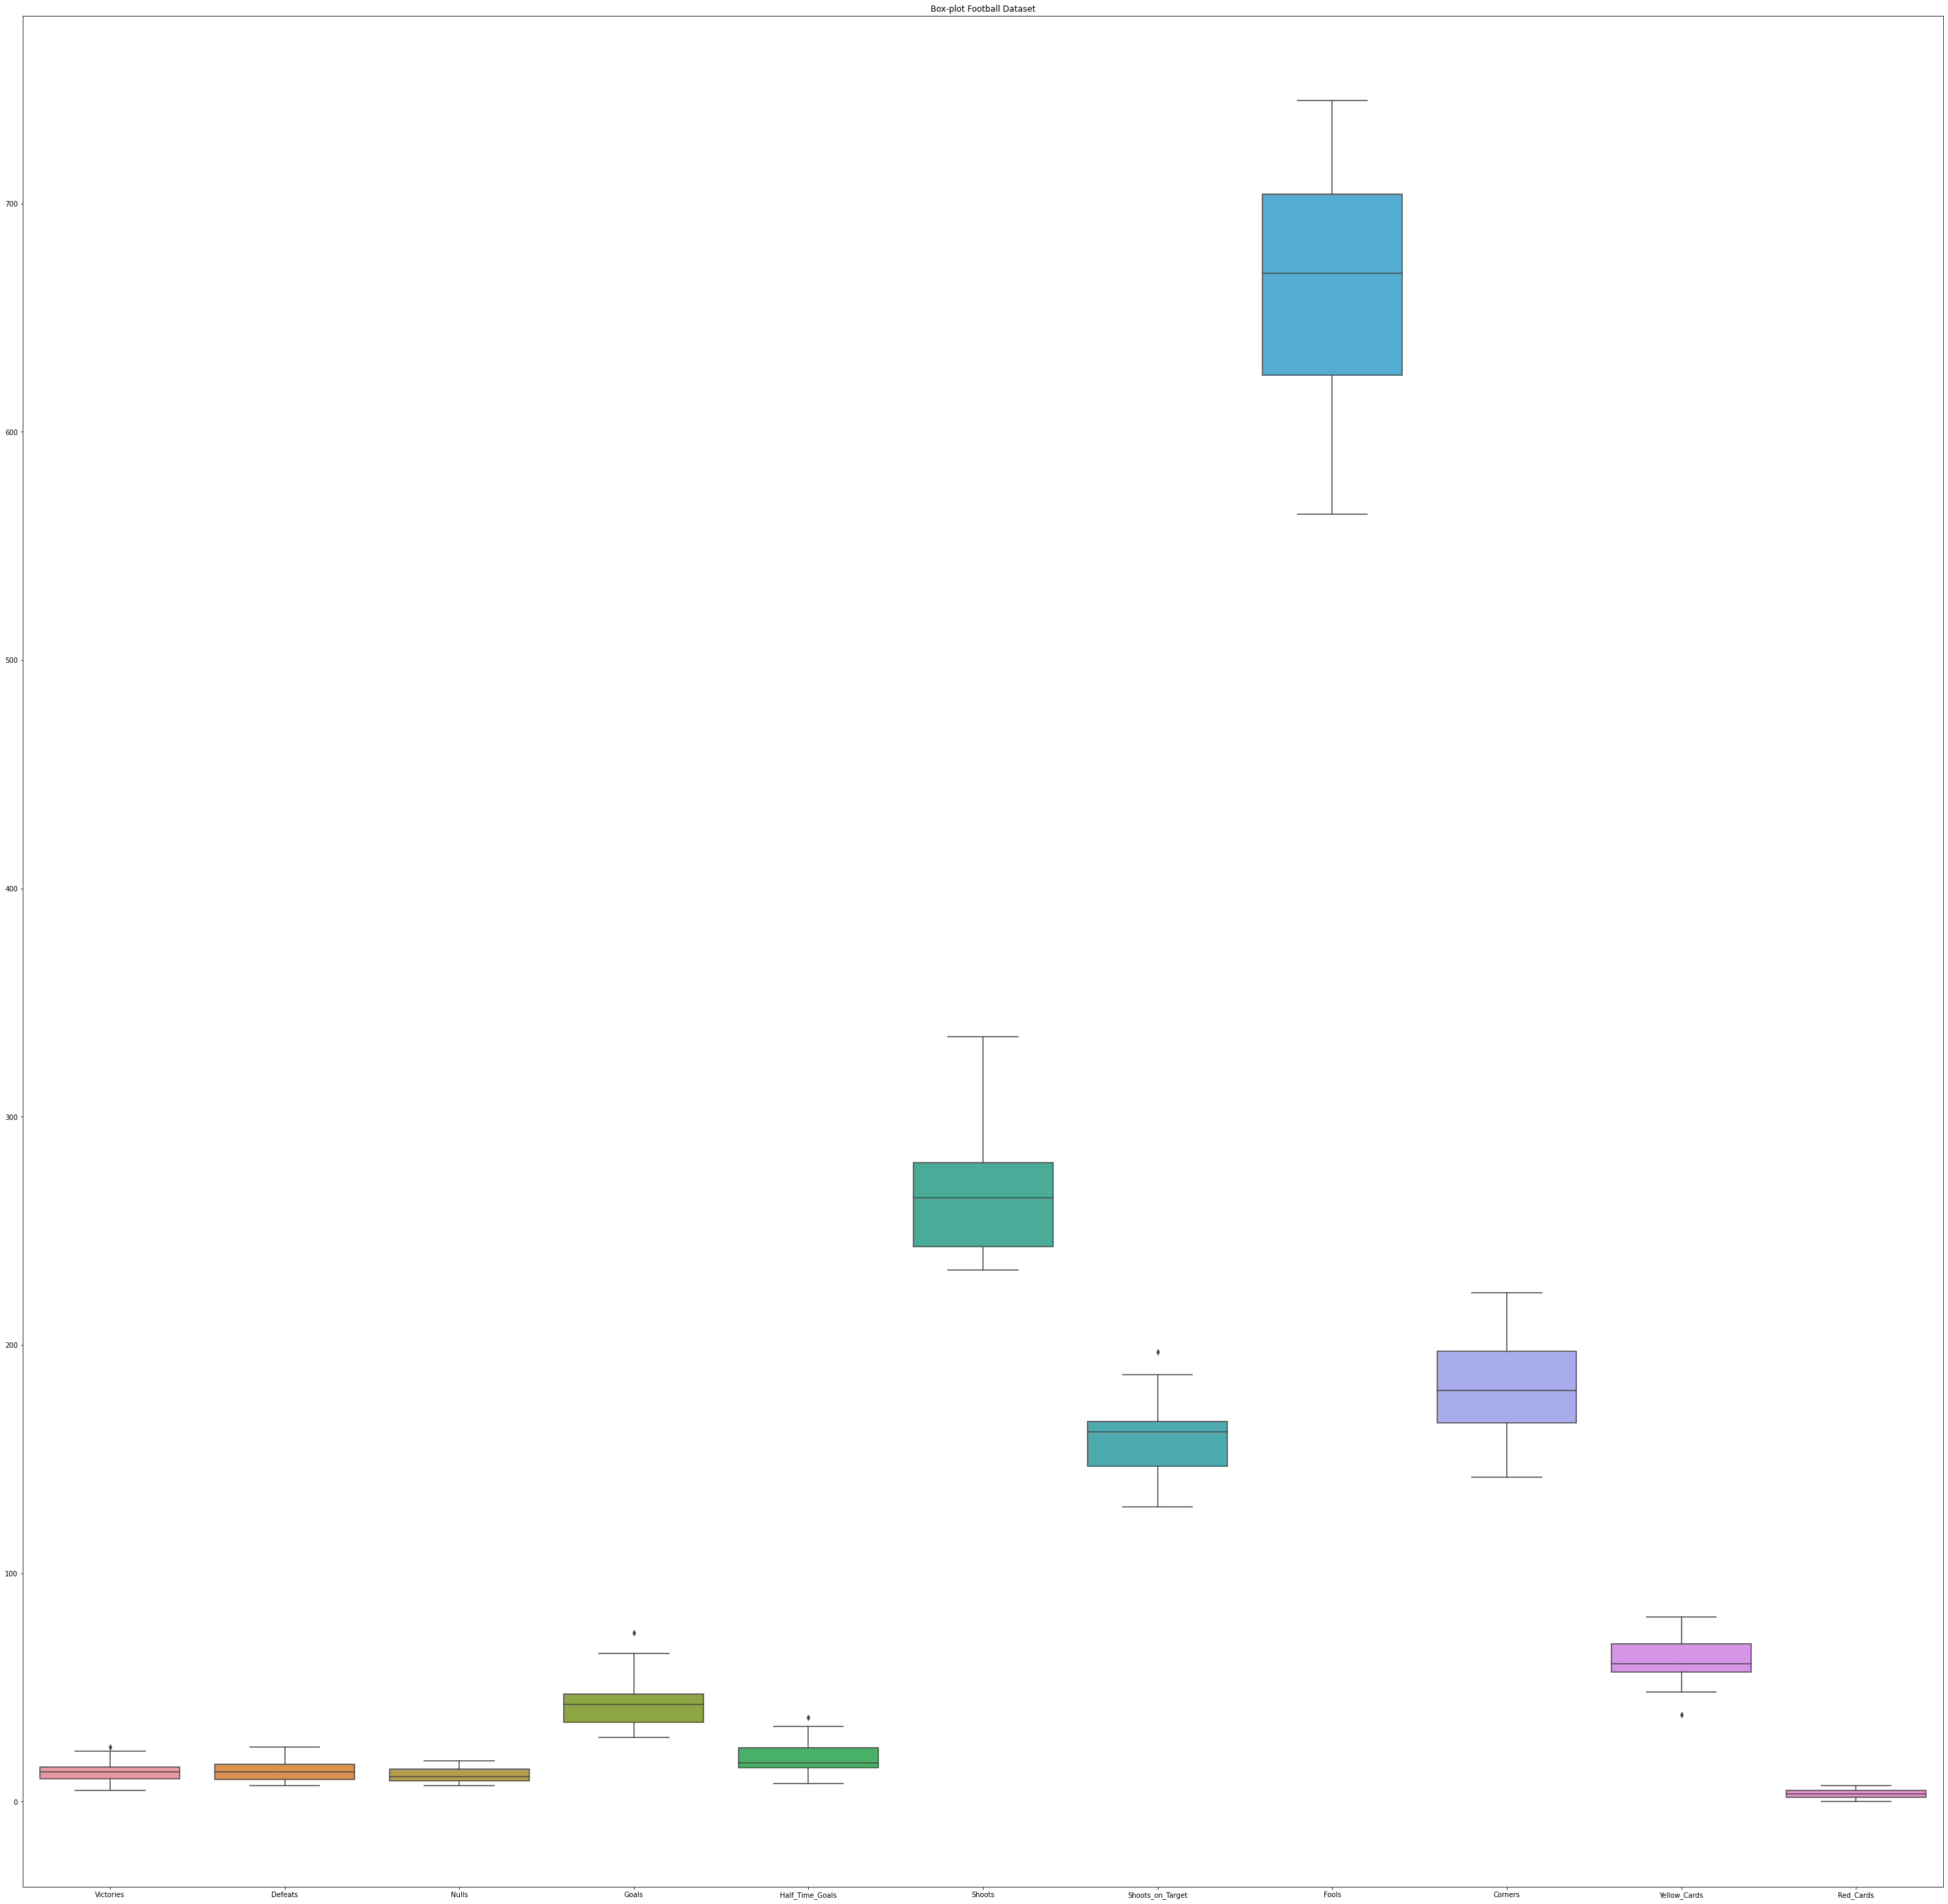

<Figure size 3600x3600 with 0 Axes>

In [9]:
def box_plot(df) : 
    
    df = df.drop(["Team","Total_Points"], axis = 1)
    plt.title('Box-plot Football Dataset')
    seaborn.boxplot(data = df)
    plt.figure()
    plt.rc('figure', figsize=[50, 50])
    
box_plot(df_foot_agg)

Avec cette box-plot, on remarque peu de valeurs abérrantes => statistiquement, les données sont bien réparties et aucun comportement problématique n'est observable. 

Visualisation permettant de vérifier une ou deux bases mathématiques mais sans doute d'autres visualiations seraient meilleures. 

### Heat Map

In [10]:
def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    seaborn.heatmap(corr, mask=mask, cmap=cmap)
    plt.rc('figure', figsize=[8, 8])

In [11]:
foot_global = df_foot_agg.drop(["Total_Points"], axis = 1)
data_corr = foot_global.corr()

<ipython-input-10-19b315d3b44f>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


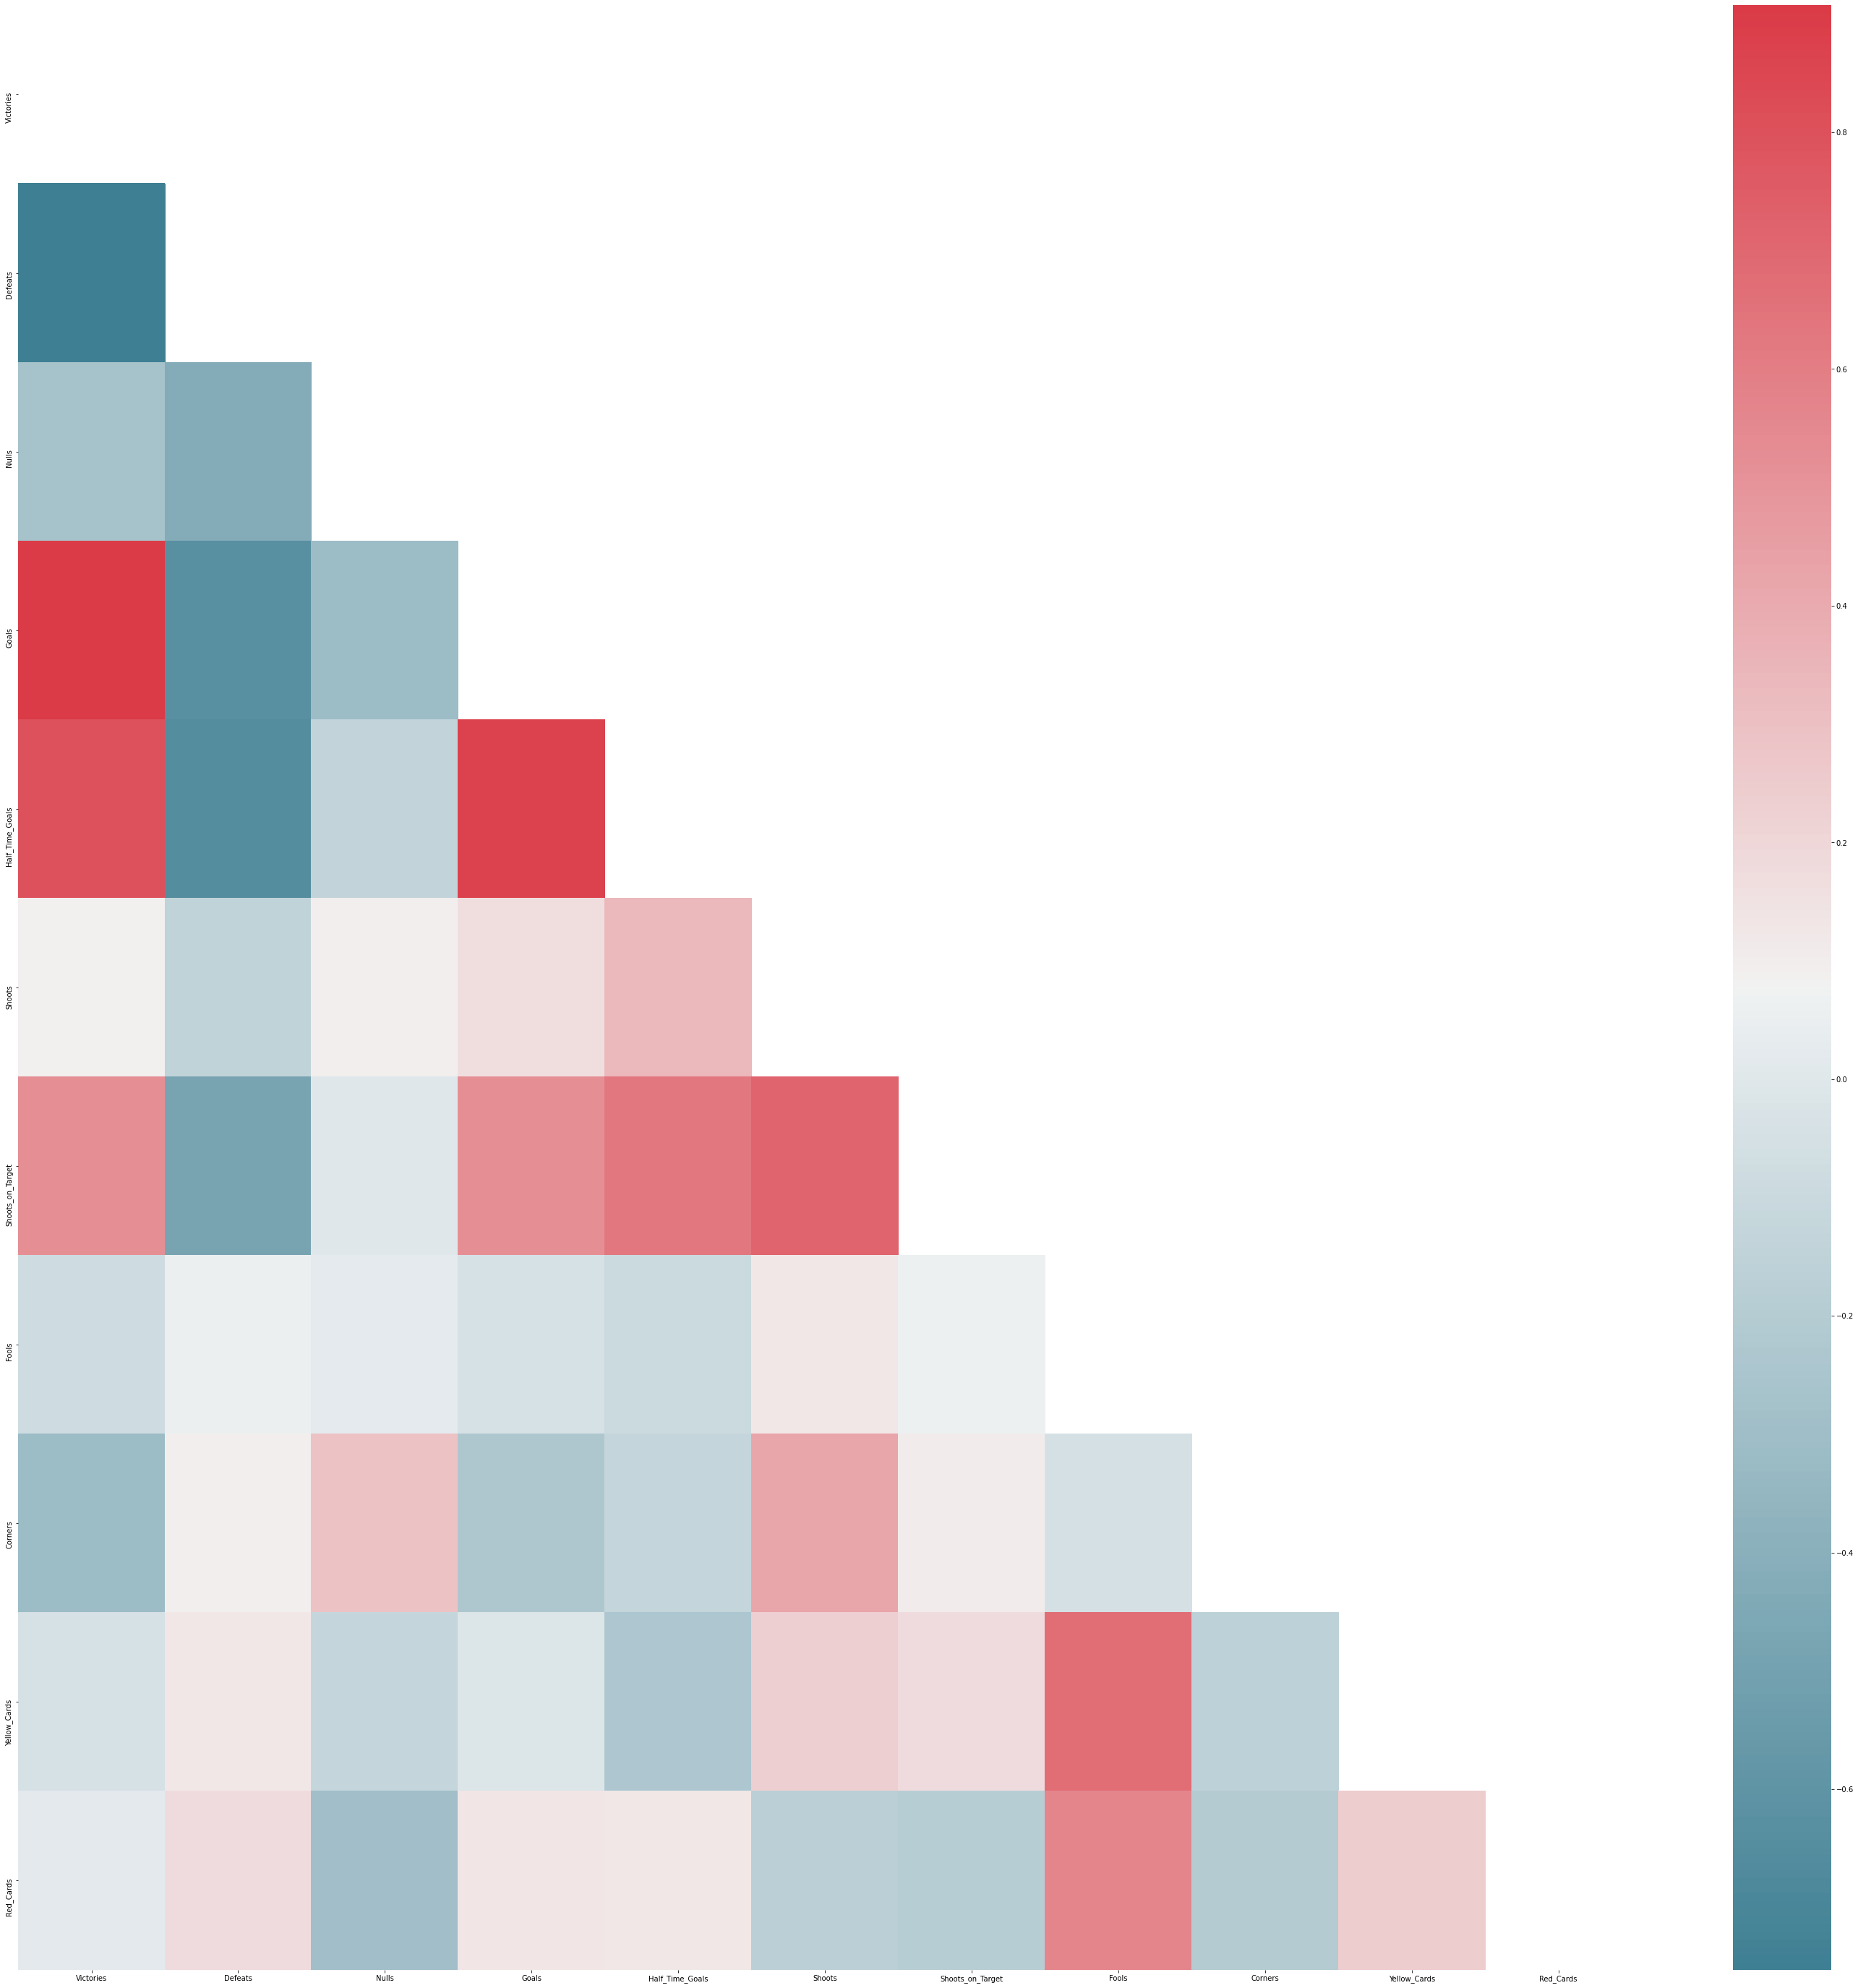

In [12]:
plot_corr(data_corr)

Permet de déterminer des corrélations : certaines sont évidentes (liens entre fautes et cartons, buts et victoires), d'autres moins (corners et matchs nuls,...). Non corrélation tirs et victoires (constante en football en france, les équipes tirant beaucoup ne gagnent pas forcément => intéressant). 

Permet d'anticiper le résultat de la PCA ou d'éliminer des facteurs peu corrélés avec le reste. 

# PCA : Principal Component Analysis

### Scalling

In [13]:
from sklearn.preprocessing import StandardScaler
foot = foot_global.copy()
foot = foot.drop(["Team"],axis = 1)
# Nous avons enlever les équipes car se sont des strings. 

In [14]:
X = foot.values # Avec cette fonction nous récupérons sous forme d'array numpy l'ensemble des valeurs
# de notre dataframe.
std_scale = StandardScaler().fit(X)
foot_scaled = std_scale.transform(X)

### Realizing the PCA 

In [15]:
def PCA_creation (scal) :
    
    pca = PCA().fit(scal)
    df_transform = pca.transform(scal)
    
    return pca, df_transform

foot_pca, foot_proj = PCA_creation(foot_scaled)

Maintenant que nous avons fait tourner l'algorithme d'ACP, une autre analyse commence : **il faut déterminer les composantes principales.** Pour cela, nous allons **tracer une courbe** indiquant le **nombre de vecteurs obtenus** par la méthode ACP et le **pourcentage cumulé de la varriance qu'ils expliquent**.

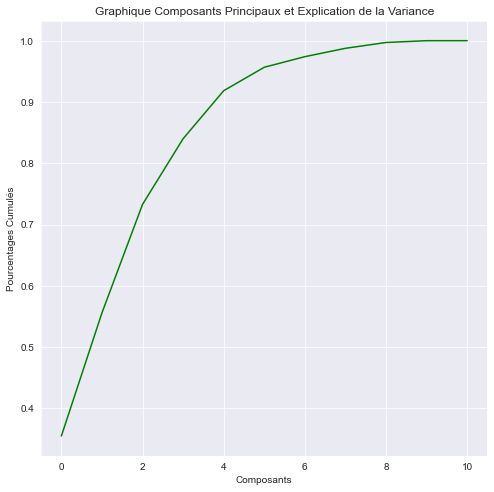

In [16]:
def PCA_graph(pca) :
    
    seaborn.set_style('darkgrid')
    plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'green')
    plt.title("Graphique Composants Principaux et Explication de la Variance")
    plt.xlabel("Composants")
    plt.ylabel("Pourcentages Cumulés")
    
PCA_graph(foot_pca)

**Conclusion :** Nous remarquons que les 4 premiers composants expliquent 90% de la variance cumulée.

Nous allons donc nous intéresser plus en détails à ces 4 premiers composants. 

Ainsi, notre dataset peut être expliqué par 4 grandes composantes, nous allons chercher à les comprendre un peu plus en profondeur. 

### Deep Dive Analysis of PCA

In [17]:
# On récupère l'intégralité des colonnes restantes du Dataframe
list_colums = list(foot.columns)

In [18]:
def pca_dive_deep (pca_proj, df, columns_list, num_components) :
    
    _, axes = plt.subplots(ncols=11, figsize=(25,5))
    for i, (ax, col) in enumerate(zip(axes, columns_list)):
        ax.scatter(pca_proj[:,num_components], foot_global[col])
        ax.set_title(f'Component {num_components} vs {col}')

#### First component

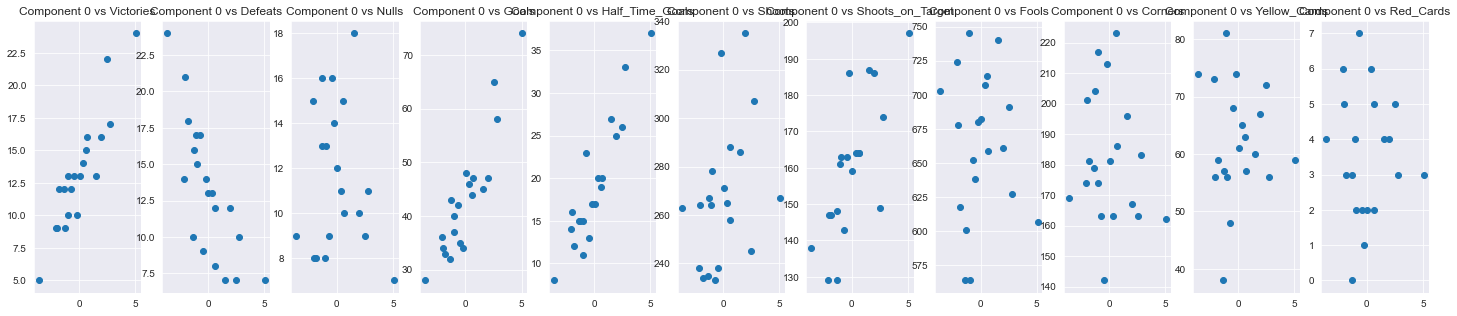

In [19]:
pca_dive_deep(foot_proj, foot, list_colums, 0)

Le nombre de victoires, le nombre de buts, le nombre de buts, les tirs totaux et cadrés semblent positivement corrélés avec le premier composant de la PCA. 

#### Second component

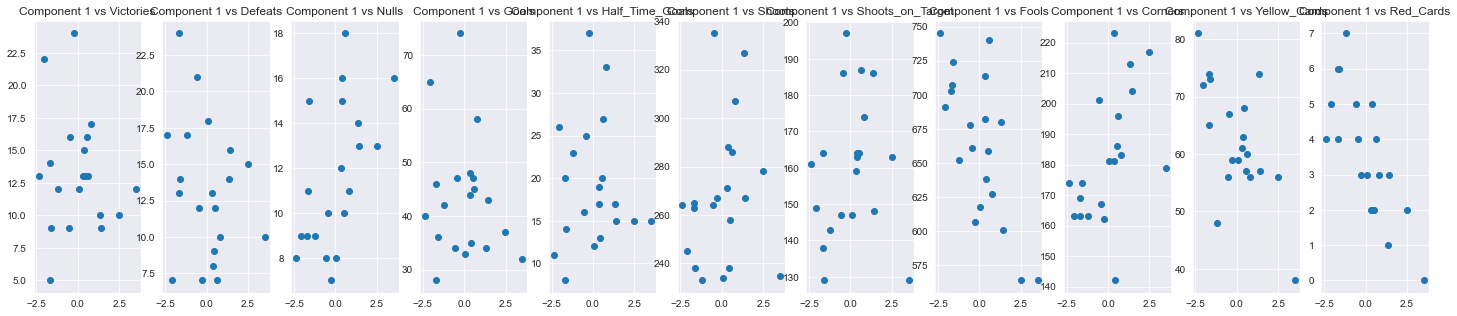

In [20]:
pca_dive_deep(foot_proj, foot, list_colums, 1)

Le second composant semble corrélés positivement avec le nombre de matchs nulls. Il est corrélés négativement avec le nombre de fautes, de cartons rouges et jaunes. 

#### Third component

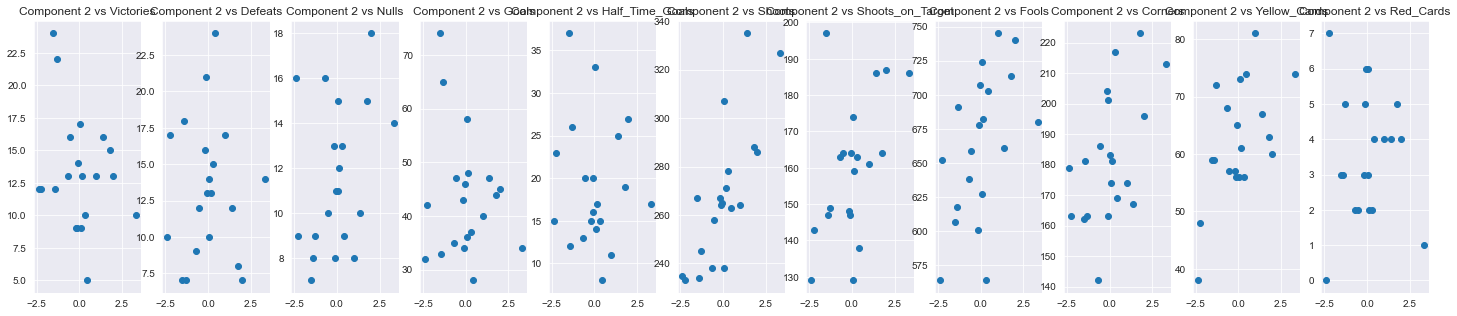

In [21]:
pca_dive_deep(foot_proj, foot, list_colums, 2)

Des corrélations positives entre le troisième composants de l'ACP et les tirs cadrés, tirs, corners sont distinguables. 

#### Fourth component

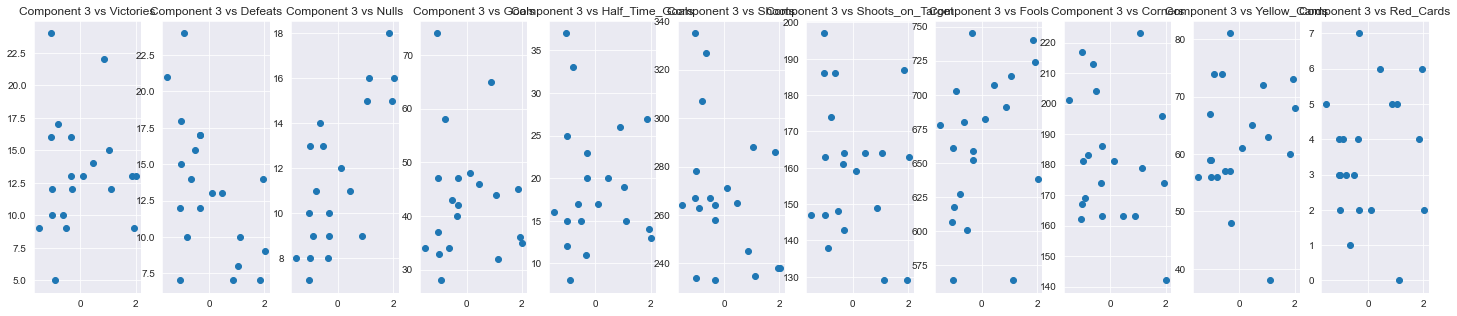

In [22]:
pca_dive_deep(foot_proj, foot, list_colums, 3)

Une corrélation inverse peut être repérée : 4e composant et défaites. Une corrélation positive entre ce composant et le nombre de nuls sur une saison. 

**Conclusion :** Réaliser une ACP/PCA en cherchant à comprendre le contenu des composants permet de mieux expliquer les résultats d'analyses statistiques futures. 

#### Correlation Chart

In [23]:
def correlation_chart(df, pca) :
    
    components=pca.components_

    for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
        plt.plot([0, x], [0, y], color='k')
        plt.text(x, y, df.columns[i])

    plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

    plt.xlim(-0.7, 0.7)
    plt.ylim(-0.7, 0.7)
    plt.title("Graphique de Correlation (visualisation avec composant 1 et 2)")
    plt.rc('figure', figsize=[25, 25])

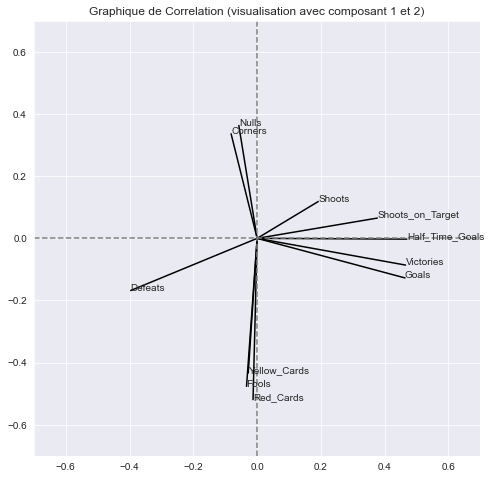

In [24]:
correlation_chart(foot, foot_pca)

En fonction des composants, le graphique des corrélations peut varier mais les corrélations reste relativement identiques. Le candidat peut utiliser ce graphique pour tirer des conclusions "business". 

# Clustering : K-Means 

Beaucoup d'algorithmes de clustering existent (méthode des centroïdes/K-Means, clustering hiérarchique, méthode à densité). Par soucis de simplicité mais aussi car il s'agit de la méthode la plus courrante, nous allons utiliser la méthode des K-Means. 

La metric de choix du nombre de cluster sera la Silhouette. 

### Data pre-processing

Nous allons réutiliser les composants de la PCA afin de produire un clustering.

In [25]:
pca_df = pd.DataFrame(foot_scaled[0:5])

### Tuning and first analysis

Nous allons tenter de trouver les paramètres les plus pertinents pour notre K-Means, nous allons donc jouer sur le nombre de clusters et sur la distance. 

In [26]:
def optimization (df, nb) :
    
    range_algorithm = ["auto", "full", "elkan"]
    range_n_clusters = range(2,nb+1)
    for a in range_algorithm:
        for n in range_n_clusters:
            kmeans = KMeans(n_clusters=n, n_init=100, algorithm = a).fit(df) 
            cluster_labels = kmeans.labels_ 
            silhouette_avg = silhouette_score(df, cluster_labels)
            
            print("For n =", n, "and for algorithm :", a, "Silhouette_score:", silhouette_avg) 
        

In [27]:
optimization (pca_df,4)

For n = 2 and for algorithm : auto Silhouette_score: 0.277817167273587
For n = 3 and for algorithm : auto Silhouette_score: 0.1313492058489336
For n = 4 and for algorithm : auto Silhouette_score: 0.02180911794881903
For n = 2 and for algorithm : full Silhouette_score: 0.277817167273587
For n = 3 and for algorithm : full Silhouette_score: 0.1313492058489336
For n = 4 and for algorithm : full Silhouette_score: 0.02180911794881903
For n = 2 and for algorithm : elkan Silhouette_score: 0.277817167273587
For n = 3 and for algorithm : elkan Silhouette_score: 0.1313492058489336
For n = 4 and for algorithm : elkan Silhouette_score: 0.02180911794881903


Nous pouvons remarquer que le clustering K-Means sur l'ensemble du dataset (certes en passant avec la PCA), ne mènent à rien ou à presque, les scores de silhouette sont très bas (*27,7%, l'approche ne qualifie pas le jeu de données*). 

Que faire dans ce cas ? Il sera sans doute très dur de mener une analyse globale, mais tout n'est pas perdu ! Grâce au graphique de corrélation, il est possible de mener des "clustering locaux" (sur un dataframe retraité, avec des colonnes en moins) qui permettront de faire émerger des tendances et de mener une analyse globale par regroupement (regroupement des différents clusters). 

**En cas d'analyse réussie, il aurait fallu reboucler avec le nom des équipes, quelques retraitements en amont ou en aval aurait été nécessaires.**

### Example of local clustering

Ici, un unique exemple est donné. Cependant, il peut être utile d'étudier les corrélations fortes, inverses mais aussi les corrélations surprenantes déterminées avec la PCA (graphique de corrélation, heat map). 

#### Selection of the criterias

Nous decidons de réaliser un clustering sur 3 variables logiquement non corrélées mais parlantes pour un amateur de foot, le nombre de victoires, de défaites, et de matchs nuls. 

In [28]:
df_foot_to_cluster = foot_global.copy()

#Application des variables sélectionnées
df_foot_cluster = df_foot_to_cluster[["Victories", "Nulls","Defeats"]]

#Récupération de la liste des équipes, utile pour le mapping post prédictions
list_teams = df_foot_to_cluster[["Team"]]

#### Optimization

In [29]:
optimization(df_foot_cluster, 10)

For n = 2 and for algorithm : auto Silhouette_score: 0.3713741829849794
For n = 3 and for algorithm : auto Silhouette_score: 0.39654394527461656
For n = 4 and for algorithm : auto Silhouette_score: 0.42005463790019676
For n = 5 and for algorithm : auto Silhouette_score: 0.534717106840209
For n = 6 and for algorithm : auto Silhouette_score: 0.5867774394225862
For n = 7 and for algorithm : auto Silhouette_score: 0.5735723336764443
For n = 8 and for algorithm : auto Silhouette_score: 0.5446883755631035
For n = 9 and for algorithm : auto Silhouette_score: 0.47659416483340405
For n = 10 and for algorithm : auto Silhouette_score: 0.4887945164110025
For n = 2 and for algorithm : full Silhouette_score: 0.3713741829849794
For n = 3 and for algorithm : full Silhouette_score: 0.39654394527461656
For n = 4 and for algorithm : full Silhouette_score: 0.42005463790019676
For n = 5 and for algorithm : full Silhouette_score: 0.534717106840209
For n = 6 and for algorithm : full Silhouette_score: 0.58677

Nombre de cluster optimal : 6 (score de silhouette de 58%), choix de l'algorithm : peu importe. 

#### Predictions 

In [30]:
def predictions (df1, df2, nb_cluster, algo) :
    
    kmeans = KMeans(n_clusters = nb_cluster, random_state = 42, algorithm = algo).fit(df1)
    centers = kmeans.cluster_centers_
    preds = kmeans.predict(df1)
    
    df1["Clusters"] = preds
    
    df1 = df1.reset_index()
    
    df2 = df2.reset_index()
    
    df = df2.merge(df1,how = 'left', left_on = "index", right_on = "index")
    
    df = df.drop(["index"], axis = 1)
    
    return df, centers, preds

df_preds, centers_foot, preds_foot = predictions(df_foot_cluster, list_teams, 6, "auto")

<ipython-input-30-6aae19e8c833>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Clusters"] = preds


In [31]:
df_preds

,Team,Victories,Nulls,Defeats,Clusters
0,Auxerre,12.0,8.0,18.0,5
1,Bordeaux,22.0,9.0,7.0,4
2,Caen,13.0,12.0,13.0,1
3,Le Mans,14.0,11.0,13.0,1
4,Lens,9.0,13.0,16.0,2
5,Lille,13.0,18.0,7.0,3
6,Lorient,12.0,16.0,10.0,3
7,Lyon,24.0,7.0,7.0,4
8,Marseille,17.0,11.0,10.0,1
9,Metz,5.0,9.0,24.0,0


#### Visualisation

In [32]:
def cluster_visualisation (df, col1, col2, nb_clusters, algo) :
    
    kmeans = KMeans(n_clusters = nb_clusters, n_init=100, algorithm = algo).fit(df)
    x = df[col1]
    y = df[col2]
    plt.scatter(x,y,c=kmeans.labels_)
    plt.show()

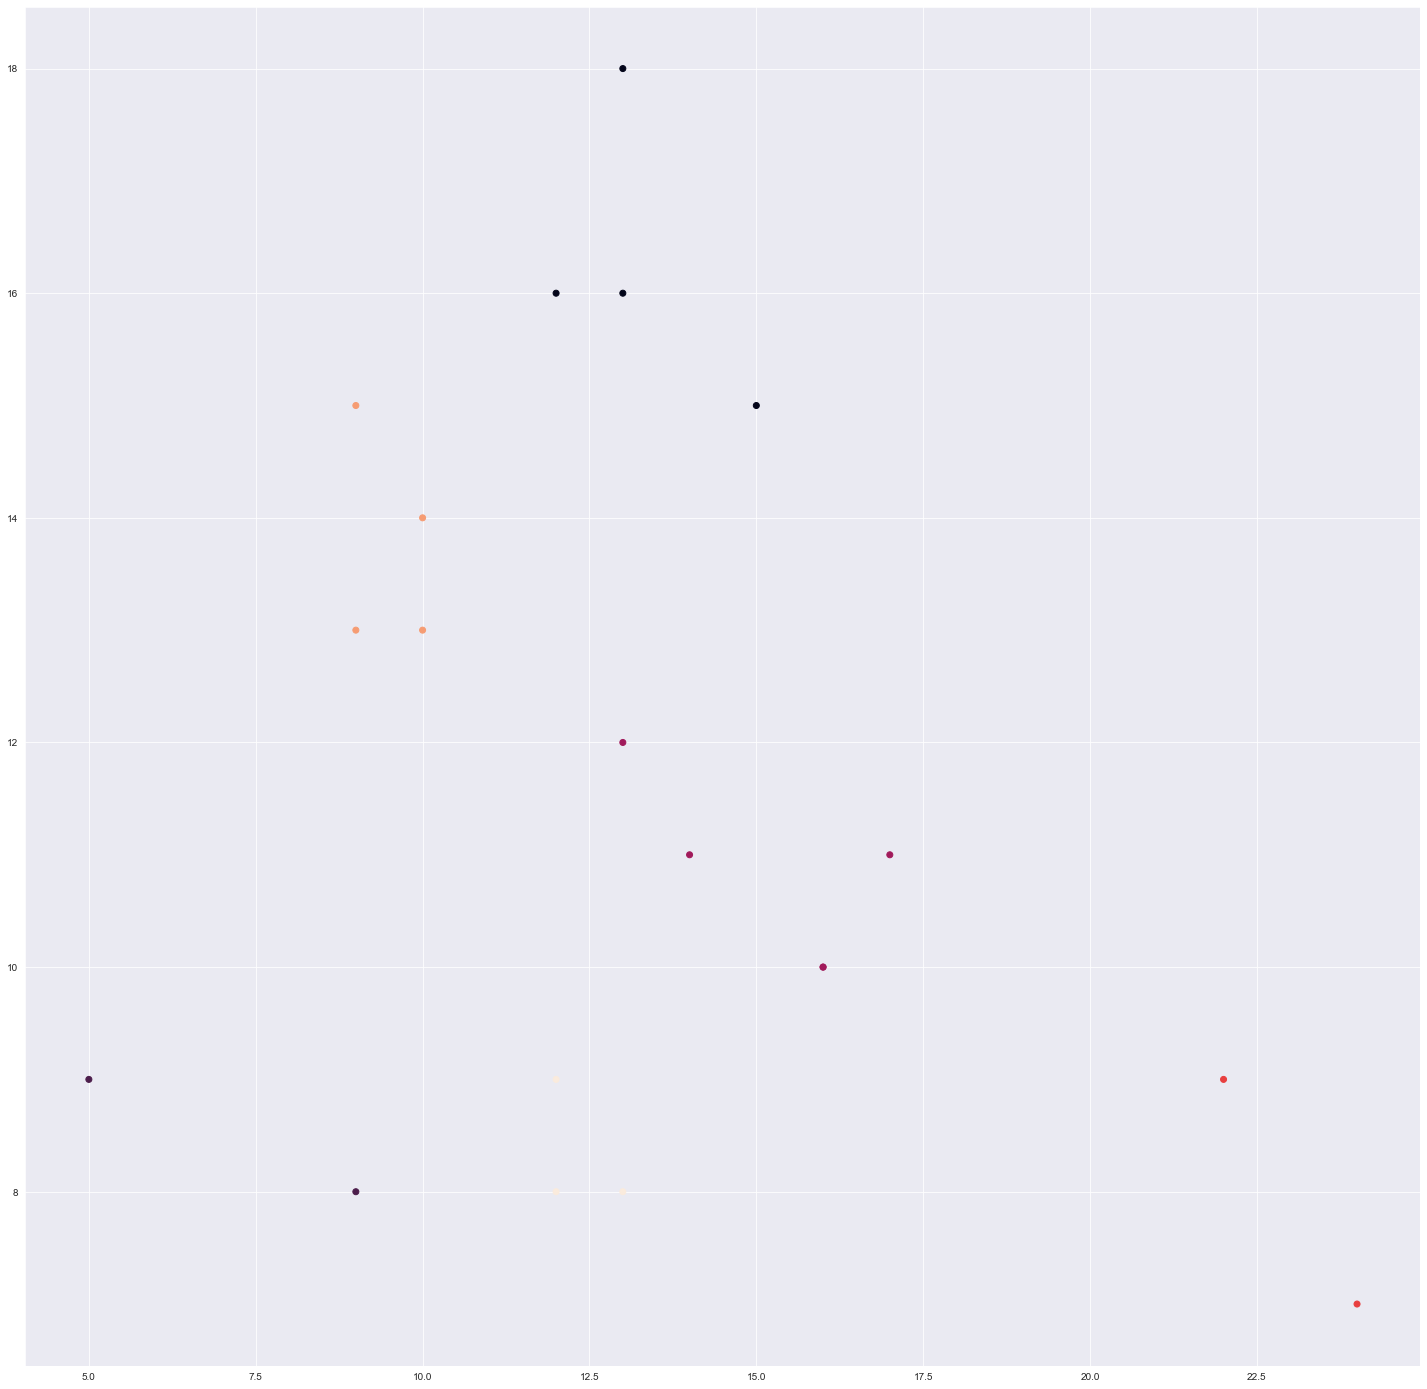

In [33]:
df_visu = df_preds.copy()

df_visu = df_visu[["Victories", "Nulls", "Defeats"]]

cluster_visualisation(df_visu, 'Victories', 'Nulls', 6, "auto")

Grâce à cette visualisation, il est possible de distinguer les différents clusters. Il compte relativement peu de membres vu la faible taille du dataset (20 lignes). 

Le candidat pourra sans doute proposer plusieurs visualisations. 